In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [78]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)

m = 10
fc = 50
min_separation = 0.72 / fc
N = 20

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

In [79]:
reload(dual_certificates)

<module 'dual_certificates' from 'dual_certificates.pyc'>

In [80]:
zeros = np.zeros((N, N))
G = np.kron(
    np.identity(m),
    dual_certificates._interpolator_norm_quadratic_form(kernel, support))
A, y = dual_certificates._interpolator_linear_constraints(kernel, support, sign_pattern)

In [81]:
print G.shape
print A.shape

(800, 800)
(420, 800)


In [84]:
2 * m * support.shape[0]

400

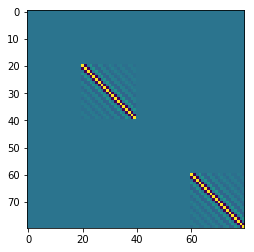

In [86]:
plt.imshow(dual_certificates._interpolator_norm_quadratic_form(kernel, support))

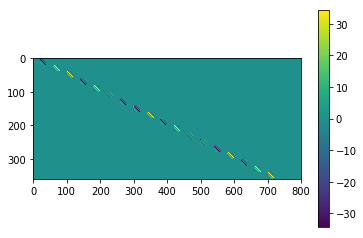

In [90]:
plt.imshow(A.real[:360, :])
plt.colorbar()

In [93]:
np.diag(kernel.inners_of_shifts_and_derivative_shifts(support).real)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

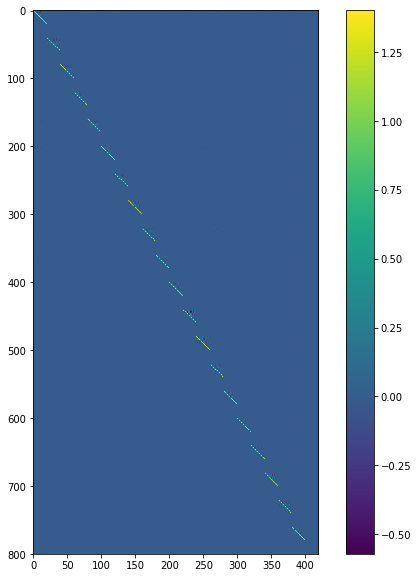

In [82]:
plt.subplots(figsize=(10, 10))
plt.imshow(np.linalg.multi_dot([
        np.linalg.inv(G),
        A.T,
        np.linalg.inv(
            np.linalg.multi_dot([
                    A,
                    np.linalg.inv(G),
                    A.T
                ])
        )
    ]).real)
plt.colorbar()

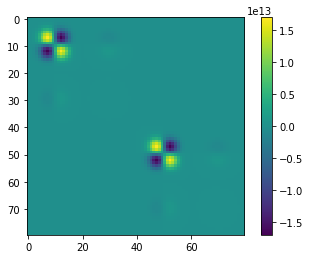

In [96]:
plt.imshow(np.linalg.inv(dual_certificates._interpolator_norm_quadratic_form(kernel, support)))
plt.colorbar()

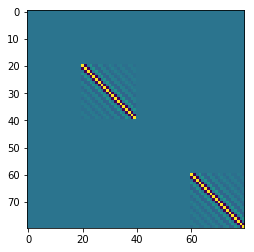

In [97]:
plt.imshow(dual_certificates._interpolator_norm_quadratic_form(kernel, support))